In [17]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib as plt
%matplotlib inline

# PASO 1: EXTRACCIÓN DE DATOS

# PASO 2: SUBIMOS LA DATA

In [2]:
datos_excel = pd.read_excel(open('Amazon200.xls','rb'))
datos_excel = pd.DataFrame(datos_excel)
datos_excel.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,@josejoiys https://t.co/1sXNSBZEh1,34,1279914147774443520,2020-07-05 23:04:47,Twitter Web App,3,1
1,@OmarLeeOficial https://t.co/G3GALkYuUi,39,1279912966104760320,2020-07-05 23:00:05,Twitter Web App,1,0
2,@CDarioRodriguez Drama: Little Fires Everywher...,102,1279904492213821440,2020-07-05 22:26:25,Twitter Web App,1,1
3,@_salvapantallas https://t.co/j3x7GE08Ax,40,1279901382837927936,2020-07-05 22:14:03,Twitter Web App,1,0
4,@SILVAELIAS_ ¿Quien es exactamente?,35,1279898974263050240,2020-07-05 22:04:29,Twitter Web App,0,0


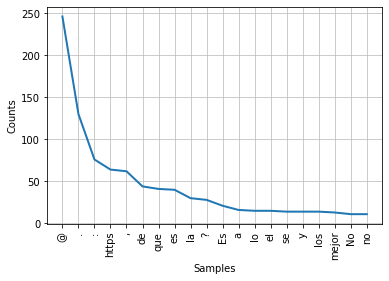

In [3]:
Tweets = ""
for data in datos_excel['Tweets']:
    Tweets += data
    
freq = FreqDist(word_tokenize(Tweets))
freq.plot(20)

# PASO 3: CLEAN DATA

In [4]:
import emoji
import re

from nltk.corpus import stopwords
import string

In [5]:
stopwordList = stopwords.words("Spanish")
stopwordList

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [6]:
punctuationList = list(string.punctuation)
punctuationList

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [7]:
#stopwordsList all in one
stopwordsList = stopwordList + punctuationList + ['“','”','¡','¿', "''",'``','...','→','⬥', '«', '»']

In [8]:
# Post
Tweets = Tweets.lower()

In [9]:
def clean_tweets_emoji(text):
    allchars = [stri for stri in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    
    return clean_text

In [10]:
tweets_clean_emoji = clean_tweets_emoji(Tweets)
tweets_clean_emoji

'@josejoiys https://t.co/1sxnsbzeh1@omarleeoficial https://t.co/g3galkyuui@cdariorodriguez drama: little fires everywhere ciencia ficción: tales from the loop amor: modern love@_salvapantallas https://t.co/j3x7ge08ax@silvaelias_ ¿quien es exactamente?—¿cuál es tu sueño? —poder dormir antes de las 12 después de iniciar un maratón de star wars. —nadie lo ha logrado nunca. ¿la empezamos hoy?@oleicymar esa es la mejor respuesta. @deivid_pela https://t.co/qlhwqdonrv@ay_lola creo que es sentimiento que a todos nos da con estrenos como este. https://t.co/ovncjqciix@afalcon89 es una buena opción para hacer maratón. yo creo que más bien ya deberías tenerla. el sentimiento siempre será mutuo. @deivid_pela ¿la vamos a empezar hoy?@marianadaria vas hacer que me sonroje.@marcos_adrian9 no es lo mejor leer el: "ya esta disponible". serie de época personajes contemporáneos. ¿les suena familiar? #madmen ya está disponible.… https://t.co/5vioe41sni@fraaanyork 5 días para el gran estreno.@roesteban_ est

In [11]:
def clean_tweets_regex(text):
    tweet = re.sub(r'@[a-zA-Z0-9-_.]+', '', text)
    tweet = re.sub(r'#[a-zA-Z0-9-_.]+', '', tweet)
    tweet = re.sub(r'https://[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'www.[a-zA-Z0-9-_./]+', '', tweet)
    tweet = re.sub(r'[a-zA-Z0-9-./]+[…]', '', tweet)
    tweet = re.sub(r'[ ]+[…]', '', tweet)
    tweet = re.sub('\n|\r', '', tweet)
    tweet = re.sub(r'[á|ä|â|à]', 'a', tweet)
    tweet = re.sub(r'[é|ê|è]', 'e', tweet)
    tweet = re.sub(r'[í|î|ì]', 'i', tweet)
    tweet = re.sub(r'[ó|ô|ò]', 'o', tweet)
    tweet = re.sub(r'[ú|û|ù|ü]', 'u', tweet)
    tweet = re.sub(r'RT ', '', tweet)
    tweet = re.sub(r'[^\s\w]', '', tweet)
    return tweet

In [12]:
tweets_clean = clean_tweets_regex(tweets_clean_emoji)
tweets_clean

'   drama little fires everywhere ciencia ficcion tales from the loop amor modern love  quien es exactamentecual es tu sueño poder dormir antes de las 12 despues de iniciar un maraton de star wars nadie lo ha logrado nunca la empezamos hoy esa es la mejor respuesta   creo que es sentimiento que a todos nos da con estrenos como este  es una buena opcion para hacer maraton yo creo que mas bien ya deberias tenerla el sentimiento siempre sera mutuo  la vamos a empezar hoy vas hacer que me sonroje no es lo mejor leer el ya esta disponible serie de epoca personajes contemporaneos les suena familiar  ya esta   5 dias para el gran estreno estamos a solo unos dias del estreno hoy empieza la cuenta regresiva si es buenaza    buenaza  se ve que se divirtio horrores haciendola bueno es que es inolvidable como bane eres el unico que la ha mencionado y es una gran cinta  bane si totalmente de acuerdo ay hola es mas musculo que persona en esa uf es que bane es el mejor de los enemigos de batman locke

In [13]:
filtro = [palabra for palabra in word_tokenize(tweets_clean) if palabra not in stopwordsList]
filtro

['drama',
 'little',
 'fires',
 'everywhere',
 'ciencia',
 'ficcion',
 'tales',
 'from',
 'the',
 'loop',
 'amor',
 'modern',
 'love',
 'exactamentecual',
 'sueño',
 'poder',
 'dormir',
 '12',
 'despues',
 'iniciar',
 'maraton',
 'star',
 'wars',
 'nadie',
 'logrado',
 'nunca',
 'empezamos',
 'hoy',
 'mejor',
 'respuesta',
 'creo',
 'sentimiento',
 'da',
 'estrenos',
 'buena',
 'opcion',
 'hacer',
 'maraton',
 'creo',
 'mas',
 'bien',
 'deberias',
 'tenerla',
 'sentimiento',
 'siempre',
 'sera',
 'mutuo',
 'vamos',
 'empezar',
 'hoy',
 'vas',
 'hacer',
 'sonroje',
 'mejor',
 'leer',
 'disponible',
 'serie',
 'epoca',
 'personajes',
 'contemporaneos',
 'suena',
 'familiar',
 '5',
 'dias',
 'gran',
 'estreno',
 'solo',
 'dias',
 'estreno',
 'hoy',
 'empieza',
 'cuenta',
 'regresiva',
 'si',
 'buenaza',
 'buenaza',
 've',
 'divirtio',
 'horrores',
 'haciendola',
 'bueno',
 'inolvidable',
 'bane',
 'unico',
 'mencionado',
 'gran',
 'cinta',
 'bane',
 'si',
 'totalmente',
 'acuerdo',
 'ay',

In [65]:
type(filtro)

list

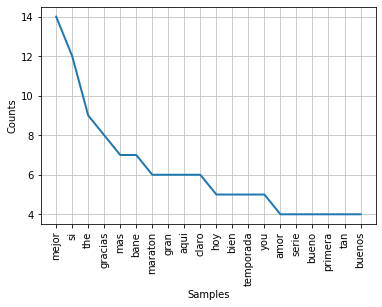

In [14]:
freq = FreqDist(filtro)
freq.plot(20)

In [85]:
type(df2)

NoneType

In [76]:
wordcloud = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Amazon")
plt.show()

NameError: name 'words' is not defined

In [21]:
from nltk.classify import NaiveBayesClassifier

In [22]:
datos_excel = pd.read_excel(open('taggedTweets.xlsx','rb'))
datos_excel = pd.DataFrame(datos_excel)
sample = datos_excel.sample(len(datos_excel))
sample

,Tweet,Retweets,Favoritos,Sentimiento
782,Inició torneo de fútbol 8 en la UNET https://t...,1,2,neu
1066,#FelizMartes #19Mar la #UniversidadNacionalAbi...,33,34,pos
1203,RT @zuleco2: #FelizJueves #27Sep \nHoy la #Uni...,8,0,pos
1359,Estudiantes donan estandarte a la UNET https:/...,1,4,pos
626,"@fjimenez110 @unacojedes Buenas tardes, debes ...",0,0,neu
...,...,...,...,...
104,Las Autoridades y comunidad de la UCLA lamenta...,2,3,neg
356,#FrasesUCV_Noticias En las batallas te das cu...,1,5,neg
71,Comunicado oficial de las autoridades de la Un...,65,20,neg
872,RT @UNETinvestiga: #Jornada20 de Ganadería en ...,15,0,neu


In [25]:
def construirBolsaDePalabras(palabras):
    diccionario={}
    for palabra in word_tokenize(palabras):
        if palabra not in stopwordsList:
            diccionario[palabra]=1
    return diccionario

In [26]:
rasgosNegativos = []
rasgosPositivos = []
rasgosNeutrales = []
    
for indice_fila, fila in sample.iterrows():
    tweet_clean = clean_tweets_emoji(fila['Tweet'])
    tweet_clean = clean_tweets_regex(tweet_clean)
    if fila['Sentimiento'] == 'pos':
        rasgosPositivos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    elif fila['Sentimiento'] == 'neu':
        rasgosNeutrales.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    else:
        rasgosNegativos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))

In [27]:
rasgosNegativos = []
rasgosPositivos = []
rasgosNeutrales = []
    
for indice_fila, fila in sample.iterrows():
    tweet_clean = clean_tweets_emoji(fila['Tweet'])
    tweet_clean = clean_tweets_regex(tweet_clean)
    if fila['Sentimiento'] == 'pos':
        rasgosPositivos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    elif fila['Sentimiento'] == 'neu':
        rasgosNeutrales.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))
    else:
        rasgosNegativos.append((construirBolsaDePalabras(tweet_clean),fila['Sentimiento']))

In [28]:
len(rasgosPositivos)

454

In [29]:
divP=int(len(rasgosPositivos)*0.95)
divNeu=int(len(rasgosNeutrales)*0.95)
divNeg=int(len(rasgosNegativos)*0.95)
clasificadorSentimiento=NaiveBayesClassifier.train(rasgosPositivos[:divP]+rasgosNegativos[:divNeg]+rasgosNeutrales[:divNeu])

In [30]:
nltk.classify.util.accuracy(clasificadorSentimiento,rasgosPositivos[:divP]+rasgosNegativos[:divNeg]+rasgosNeutrales[:divNeu])


0.9435421500386698

In [31]:
nltk.classify.util.accuracy(clasificadorSentimiento,rasgosPositivos[divP:]+rasgosNegativos[divNeg:]+rasgosNeutrales[divNeu:])


0.6666666666666666

In [32]:
clasificadorSentimiento.show_most_informative_features()


Most Informative Features
                    UCLA = 1                 neg : neu    =     16.6 : 1.0
             Autoridades = 1                 neg : pos    =     16.3 : 1.0
                  invita = 1                 pos : neg    =     15.0 : 1.0
                 Pruebas = 1                 neu : neg    =     11.0 : 1.0
               Venezuela = 1                 neg : pos    =     10.7 : 1.0
                    años = 1                 pos : neu    =      9.7 : 1.0
                Ciencias = 1                 neg : neu    =      9.0 : 1.0
                     Por = 1                 neg : neu    =      9.0 : 1.0
                  inicia = 1                 pos : neg    =      9.0 : 1.0
                   debes = 1                 neu : pos    =      8.3 : 1.0


In [33]:
tweet = "¿El peor solo de guitarra de la historia? Burlas a Nick Jonas por su interpretación"

print(tweet)
tweet_clean = clean_tweets_emoji(tweet)
tweet_clean = clean_tweets_regex(tweet_clean)
bolsa=construirBolsaDePalabras(tweet_clean)
print(bolsa)

¿El peor solo de guitarra de la historia? Burlas a Nick Jonas por su interpretación
{'El': 1, 'peor': 1, 'solo': 1, 'guitarra': 1, 'historia': 1, 'Burlas': 1, 'Nick': 1, 'Jonas': 1, 'interpretacion': 1}


In [34]:
clasificadorSentimiento.classify(bolsa)


'neg'

In [53]:
datos_excel = pd.read_excel(open('Amazon200.xls','rb'))
datos_excel = pd.DataFrame(datos_excel)
muestra = datos_excel.sample(len(datos_excel))
muestra 

,len,Date,Tweets,Retweets,Likes
193,35,2020-06-28 17:14:18,@Textileano Ya estamos muy cerca. 🤩,0,0
2,102,2020-07-05 22:26:25,@CDarioRodriguez Drama: Little Fires Everywher...,1,1
45,66,2020-07-04 23:14:47,"@Da_Alexander96 Todos están espectaculares, pe...",0,0
76,31,2020-07-02 23:31:38,@AngelDuoc Eso es un clásico. 😎,0,0
198,139,2020-06-28 00:00:28,"Sandra, Kate y sus secuaces roban 128 millones...",17,119
...,...,...,...,...,...
61,85,2020-07-03 22:13:07,"@dlerer @pabloculellok Nada de confusiones, aq...",0,0
47,70,2020-07-04 23:14:18,@mrsnanmibia No hay mentira en esta respuesta....,0,1
197,46,2020-06-28 00:34:45,"@bam_bammx @odioapancho Oh, no. Las estafaron.",0,1
130,38,2020-06-29 22:48:56,@marialepm13 Por hacernos tan feliz. 😍,0,1


In [54]:
positive = []
neutral = []
negative = []

In [55]:
import xlsxwriter

In [56]:
libro = xlsxwriter.Workbook('datatag.xlsx')
hoja = libro.add_worksheet('Data')

data = ["Tweet","Sentimiento"]
row = 0
col = 0
 
for titulo in data:
    hoja.write(row, col, titulo)
    col += 1
row = 1
col = 0

for indice_fila, fila in muestra.iterrows():
    print(fila[2])
    tweet_clean = clean_tweets_emoji(fila[2])
    tweet_clean = clean_tweets_regex(tweet_clean)
    bolsa=construirBolsaDePalabras(tweet_clean)
    sent = clasificadorSentimiento.classify(bolsa)
    print("\033[0;31;40m "+sent+" \033[0m")
    hoja.write(indice_fila+row, 0, fila[2])
    hoja.write(indice_fila+row, 1, sent)
    if sent == 'pos':
        positive.append(fila[2])
    elif sent == 'neu':
        neutral.append(fila[2])
    else:
        negative.append(fila[2])
libro.close()

@Textileano Ya estamos muy cerca. 🤩
 pos 
@CDarioRodriguez Drama: Little Fires Everywhere
Ciencia ficción: Tales from the Loop
Amor: Modern Love
 pos 
@Da_Alexander96 Todos están espectaculares, pero sí, sobresale él.
 neg 
@AngelDuoc Eso es un clásico. 😎
 neg 
Sandra, Kate y sus secuaces roban 128 millones de dólares y se entretienen con burbujas. Es como tu gato y la caja… https://t.co/3FMpjdO79h
 neg 
@ChronosVenom No hay nada que agradecer. ❤️
 neg 
@moisesdenis11 https://t.co/inKcAFC8BD
 pos 
@maferchalo Lo importante es que sólo es cuestión de días. 🤩
 neg 
@mati_sanchez97 Me parece un gran plan. 😎
 neg 
@afalcon89 Es una buena opción para hacer maratón. 🤩
 pos 
@DanRo1992 @SzuritaOficial @justinabus @AriasPJuanita @robtalcual @pamohpam @octavio_hm @TatisAlexander… https://t.co/pG77Iw6sr0
 pos 
@Nanaacho Es que hasta la pregunta ofende.
 pos 
@LoliAmran 😍😍😍😍
 pos 
@MontanezMarcio Ya casi... https://t.co/ePDeBQW5KJ
 neu 
@elaguanterojo_ @TeguaTitulado Es una cuestión de risas inte

# PASO 5: Mostramos la data

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

[Text(0, 0, 'Positive'), Text(0, 0, 'Neutral'), Text(0, 0, 'Negative')]

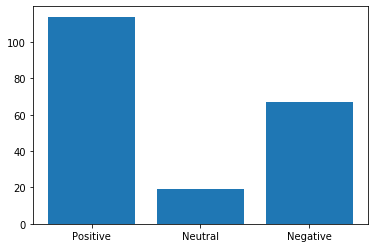

In [58]:
fig = plt.figure(u'Gráfica de barras')
ax = fig.add_subplot(111)

nombres = ['Positive','Neutral','Negative']
datos = [len(positive),len(neutral),len(negative)]
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(nombres)

In [59]:
from wordcloud import WordCloud

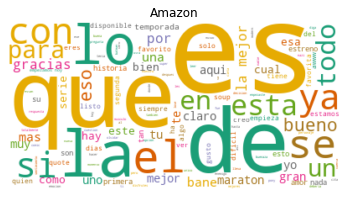

In [60]:
wordcloud = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(tweets_clean)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Amazon")
plt.show()